# Проверка допустимых параметров шума для системы из 6 кубитов

In [29]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import importlib

from qiskit.quantum_info import random_statevector, Statevector

import functions
importlib.reload(functions)
import TFI_functions
importlib.reload(TFI_functions)

# Базисные состояния
init_vector = np.zeros(2**6)
init_vector[:] = 1.0/np.sqrt(2**6)
init_state = Statevector(init_vector)

# Случайные по Хаару состояния
#init_state = random_statevector(2**6)

# Кастомные случайные состояния
#init_state = Statevector(functions.generate_random_state(num_qubits=6, coupling_map=[[0,1], [0,2], [1,3], [3,2], [2,4], [3,5], [4,5]]))

J = 0.0

"""
data['data'].shape = (число начальных состояний, число точек по времени, чистый или шумный, сколько кубитов)
"""

noise_dict = {
    "depolarizing": [0.01],
    #"extended_depolarizing": [0.0001, 0.01],
    #"thermal": [100*1e3, 100*1e3, 90]
}
noise_model = functions.generate_noise_model(noise_dict)

data = functions.test_generate_data_TFI_forward_dynamics(
    init_state=init_state, 
    num_qubits=6, 
    num_trotters=10,
    time=2*np.pi,
    time_points=30,
    h_array=[1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    J_array=[J, J, J, J, J, J, J],
    coupling_map=[[0,1], [0,2], [1,3], [3,2], [2,4], [3,5], [4,5]],
    noise_model=noise_model)

noiseless_spin = np.zeros((data['parameters']['num of qubits'], data['parameters']['time points']))
noisy_spin     = np.zeros((data['parameters']['num of qubits'], data['parameters']['time points']))

for i in range(data['parameters']['num of qubits']):
    noiseless_spin[i] = data['data'][0,:,0,i]
    noisy_spin[i]     = data['data'][0,:,1,i]

time_array = np.linspace(1e-6, data['parameters']['total sim time'], data['parameters']['time points'])

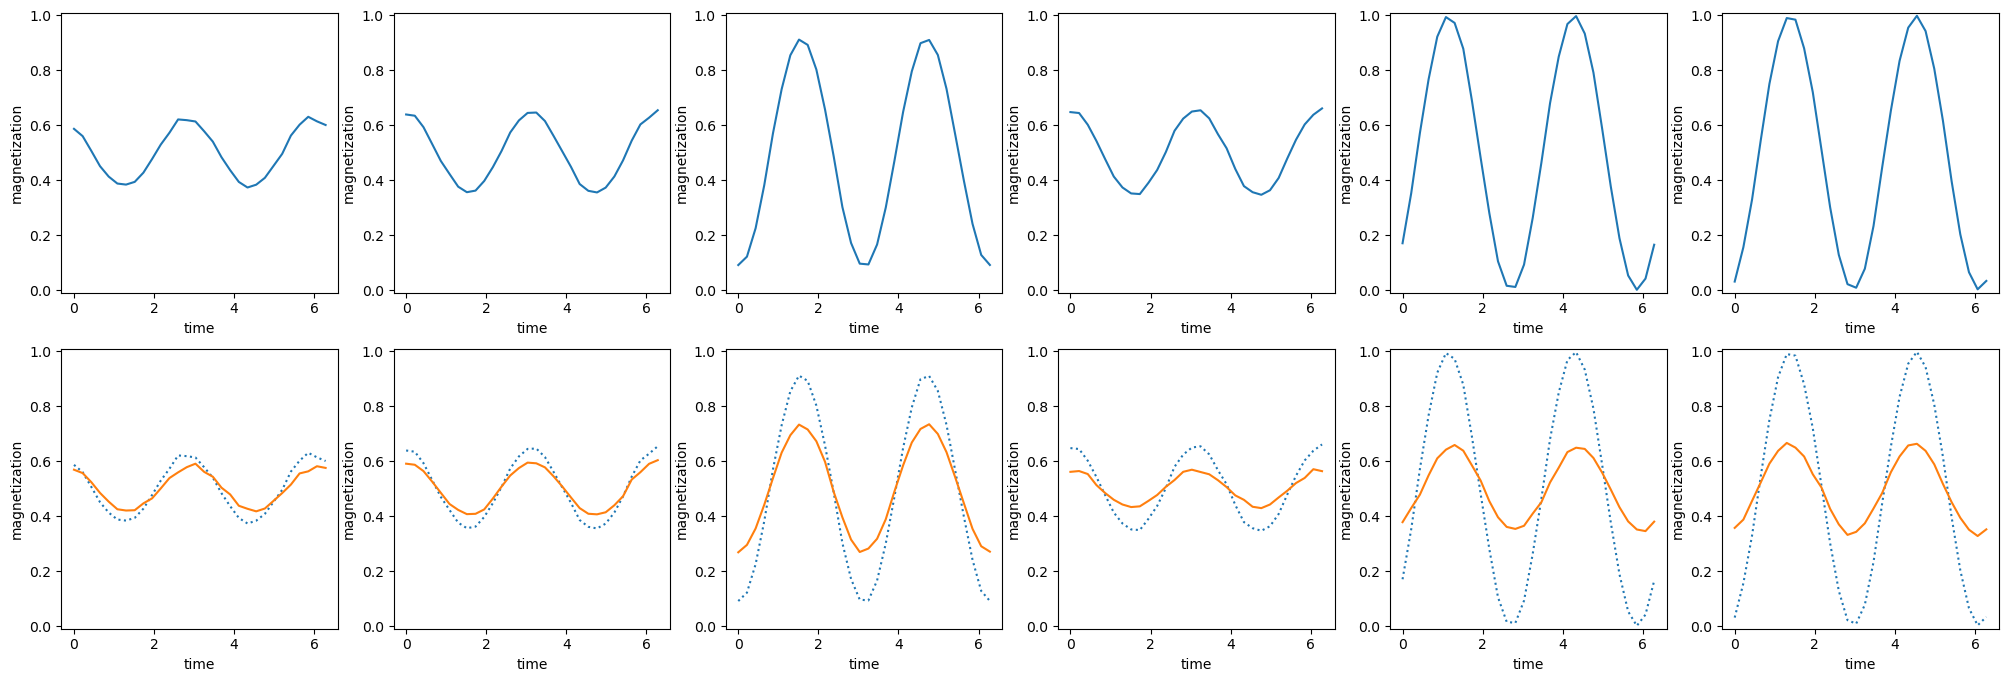

In [30]:
plt.figure(figsize=(25,8))
G = gridspec.GridSpec(2, data['parameters']['num of qubits'])

for i in range(data['parameters']['num of qubits']):
    plt.subplot(G[0,i])
    plt.plot(time_array, noiseless_spin[i])
    plt.xlabel("time")
    plt.ylabel("magnetization")
    plt.ylim(-0.01, 1.01)   
        
    plt.subplot(G[1,i])
    plt.plot(time_array, noiseless_spin[i], linestyle='dotted')
    plt.plot(time_array, noisy_spin[i])
    plt.xlabel("time")
    plt.ylabel("magnetization")
    plt.ylim(-0.01, 1.01)

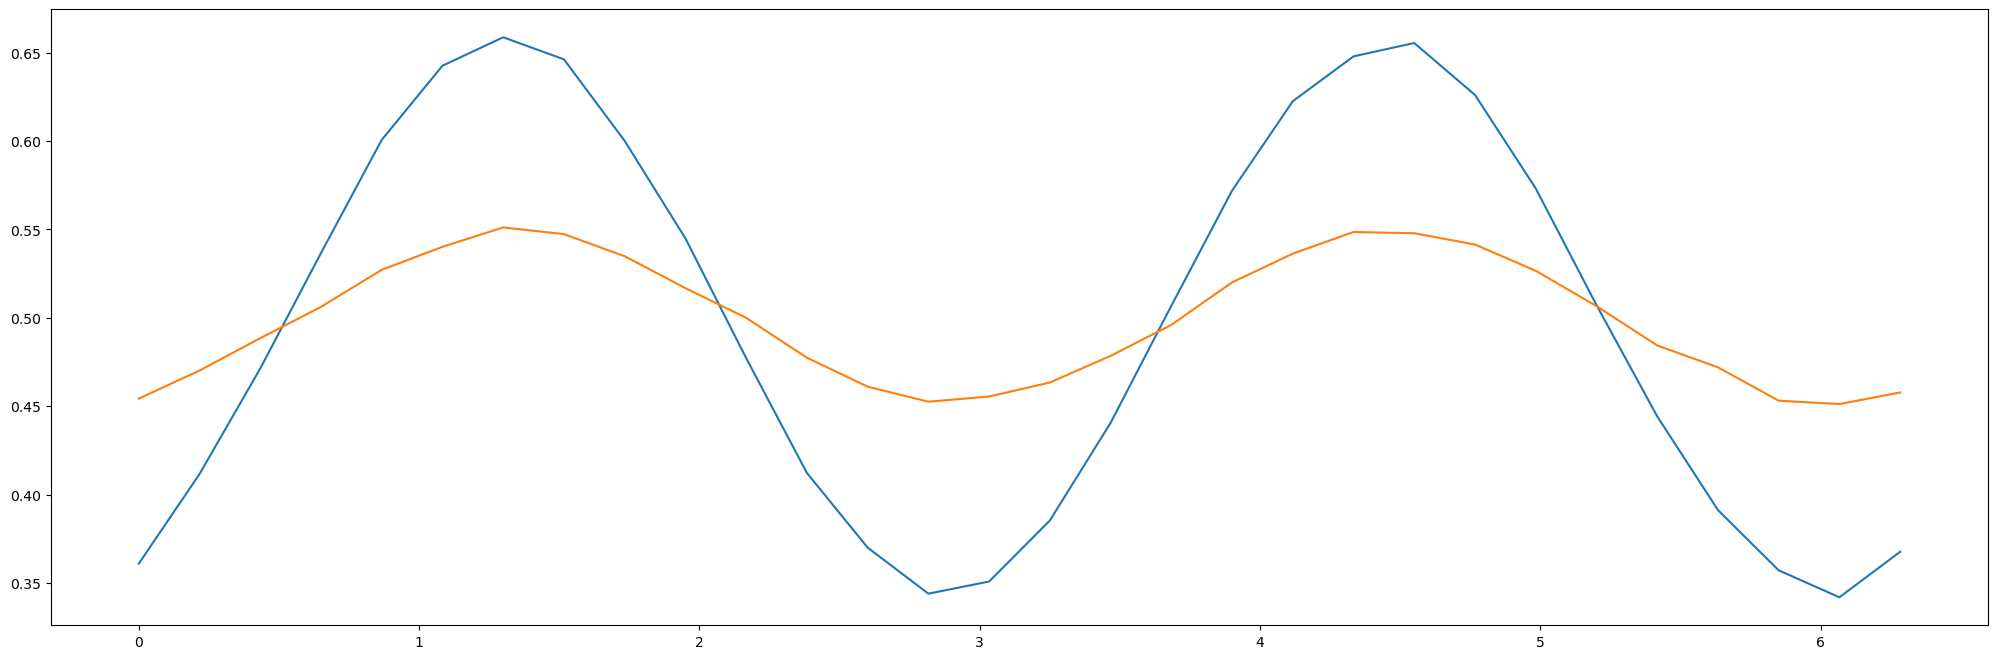

In [31]:
plt.figure(figsize=(25,8))

plt.plot(time_array, np.sum(noiseless_spin, axis=0)/6)
plt.plot(time_array, np.sum(noisy_spin, axis=0)/6)

In [28]:
data['parameters']['circuit'].count_ops()

OrderedDict([('barrier', 361),
             ('cx', 280),
             ('rz', 140),
             ('rx', 120),
             ('measure', 6),
             ('initialize', 1)])

In [69]:
import functions
importlib.reload(functions)
import TFI_functions
importlib.reload(TFI_functions)

# init_vector = np.zeros(2**6)
# init_vector[:] = 1.0/np.sqrt(2**6)
# init_state = Statevector(init_vector)
# coupling_map=[[0,1], [0,2], [1,3], [3,2], [2,4], [3,5], [4,5]]
# h_array=[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# J_array=[J, J, J, J, J, J, J]

J = 0.0

init_vector = np.zeros(2**3)
init_vector[0] = 1.0
init_state = Statevector(init_vector)
coupling_map=[[0,1], [0,2], [1,2]]
h_array=[1.0, 1.0, 1.0]
J_array=[J, J, J]
    

T1 = 567.55 # max,     ns
#T1 = 287.87 # median, ns
#T1 = 85.30  # min,    ns   

T2 = 456.02 # max,     ns
#T2 = 127.49 # median, ns
#T2 = 16.18  # min,    ns

t1q = 0*49.78  #ns
t2q = 0*611.56 #ns
tbuff = 0*10   #ns

noise_dict = {
    #"depolarizing": [0.0],
    "pauli": [0.99, 0.005, 0.005, 0.0],
    #"extended_depolarizing": [0.0001, 0.01],
    #"thermal": [T1, T2, t1q + tbuff, t2q + tbuff]
}
noise_model = functions.generate_noise_model(noise_dict)

data_decoh = functions.test_generate_data_TFI_forward_dynamics(
    init_state=init_state, 
    num_qubits=3, 
    num_trotters=10,
    time=2*np.pi,
    time_points=20,
    h_array=h_array,
    J_array=J_array,
    coupling_map=coupling_map,
    noise_model=noise_model)

noiseless_spin_decoh = np.zeros((data_decoh['parameters']['num of qubits'], data_decoh['parameters']['time points']))
noisy_spin_decoh     = np.zeros((data_decoh['parameters']['num of qubits'], data_decoh['parameters']['time points']))

for i in range(data_decoh['parameters']['num of qubits']):
    noiseless_spin_decoh[i] = data_decoh['data'][0,:,0,i]
    noisy_spin_decoh[i]     = data_decoh['data'][0,:,1,i]

time_array = np.linspace(1e-6, data_decoh['parameters']['total sim time'], data_decoh['parameters']['time points'])

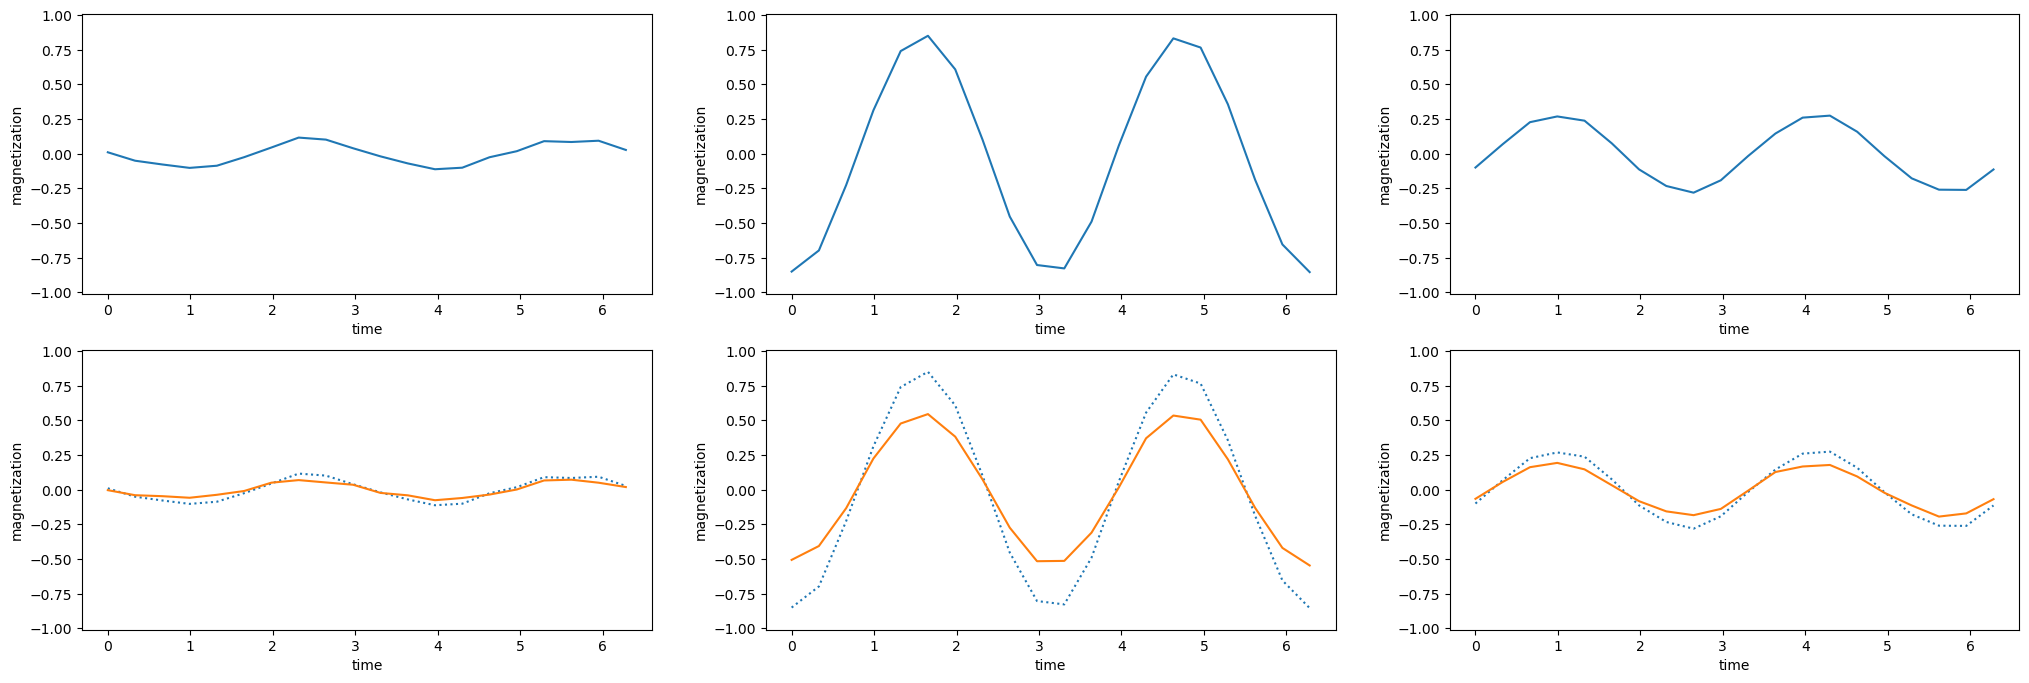

In [70]:
plt.figure(figsize=(25,8))
G = gridspec.GridSpec(2, data_decoh['parameters']['num of qubits'])

for i in range(data_decoh['parameters']['num of qubits']):
    plt.subplot(G[0,i])
    plt.plot(time_array, 2*noiseless_spin_decoh[i]-1)
    plt.xlabel("time")
    plt.ylabel("magnetization")
    plt.ylim(-1.01, 1.01)   
        
    plt.subplot(G[1,i])
    plt.plot(time_array, 2*noiseless_spin_decoh[i]-1, linestyle='dotted')
    plt.plot(time_array, 2*noisy_spin_decoh[i]-1)
    plt.xlabel("time")
    plt.ylabel("magnetization")
    plt.ylim(-1.01, 1.01)

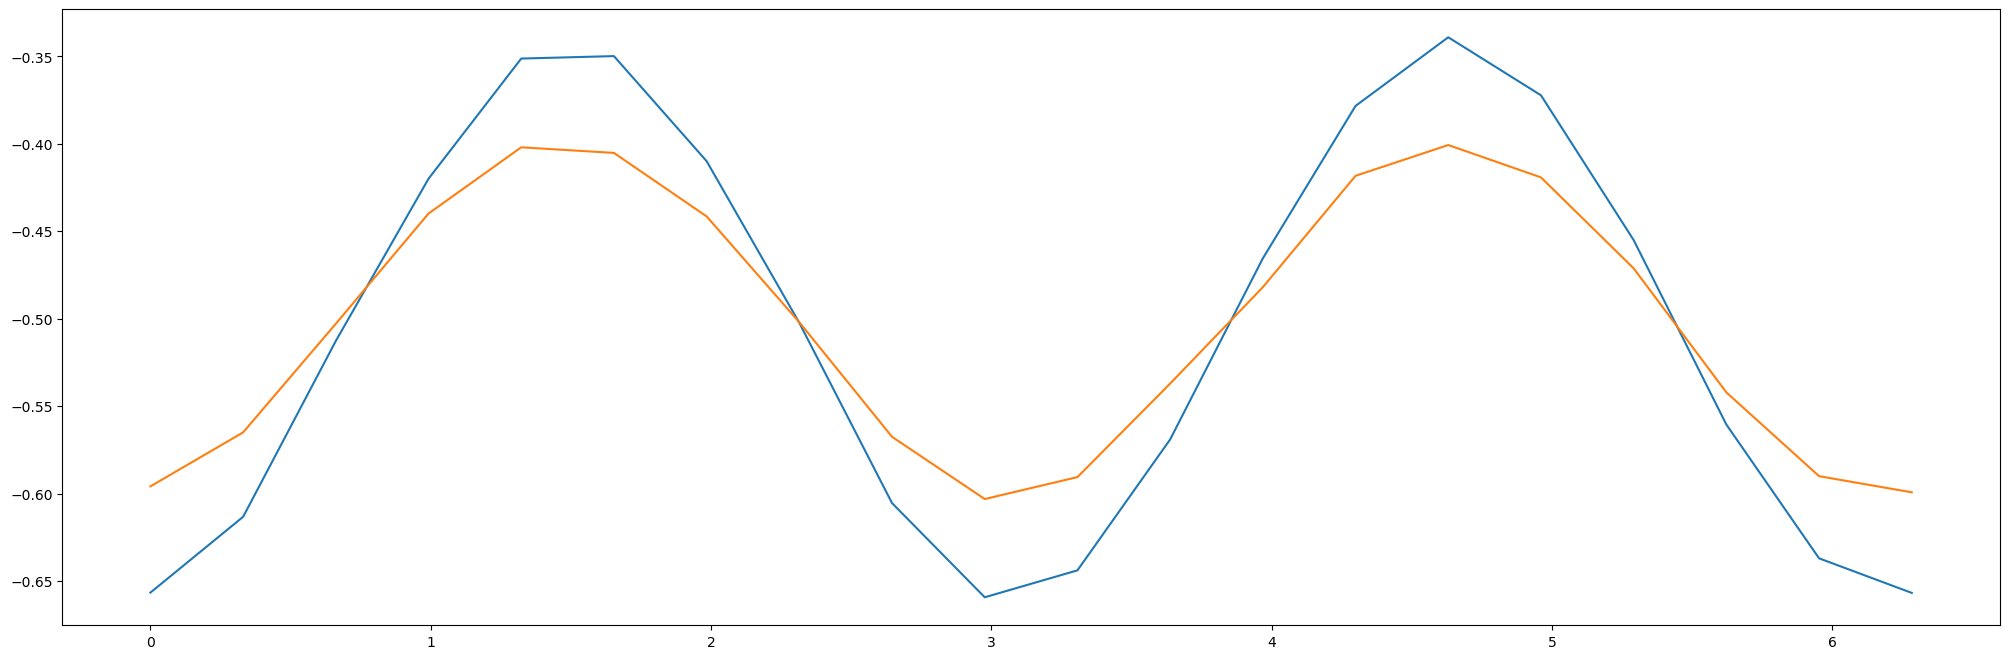

In [71]:
plt.figure(figsize=(25,8))

plt.plot(time_array, 2*np.sum(noiseless_spin_decoh, axis=0)/6-1)
plt.plot(time_array, 2*np.sum(noisy_spin_decoh, axis=0)/6-1)